In [42]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

### **Analyse du jeu de données**

In [129]:
data = pd.read_json('data/frames.json')
data.head()

,user_id,turns,wizard_id,id,labels
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc..."
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,"{'userSurveyRating': 2.0, 'wizardSurveyTaskSuc..."
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    1369 non-null   object
 1   turns      1369 non-null   object
 2   wizard_id  1369 non-null   object
 3   id         1369 non-null   object
 4   labels     1369 non-null   object
dtypes: object(5)
memory usage: 53.6+ KB


In [25]:
rating = pd.json_normalize(data['labels'])
rating.head()

,userSurveyRating,wizardSurveyTaskSuccessful
0,4.0,True
1,3.0,True
2,2.0,False
3,5.0,True
4,5.0,True


In [32]:
rating['userSurveyRating'].describe()

count    1366.000000
mean        4.573419
std         0.839596
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: userSurveyRating, dtype: float64

La satisfaction moyenne des utilisateurs est de 4.57. (Noté de 1 à 5)

In [29]:
rating['wizardSurveyTaskSuccessful'].value_counts()

True     1287
False      82
Name: wizardSurveyTaskSuccessful, dtype: int64

Il y a 82 intéractions pour lesquelles l'objectif de l'utilisteur n'a pas été atteint

In [130]:
turns_list = data['turns'].to_list()

In [131]:
turns_list[0]

[{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
  'labels': {'acts': [{'args': [{'val': 'book', 'key': 'intent'}],
     'name': 'inform'},
    {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
      {'val': 'Caprica', 'key': 'or_city'},
      {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
      {'val': '8', 'key': 'n_adults'},
      {'val': '1700', 'key': 'budget'}],
     'name': 'inform'}],
   'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
     'name': 'inform'},
    {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
      {'val': 'Caprica', 'key': 'or_city'},
      {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
      {'val': '8', 'key': 'n_adults'},
      {'val': '1700', 'key': 'budget'}],
     'name': 'inform'}],
   'active_frame': 1,
   'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
      'budget': [{'val': '1700.0', 'negated': False}],

In [39]:
list_len_dialogues = []

for turn in turns_list:
    list_len_dialogues.append(len(turn))

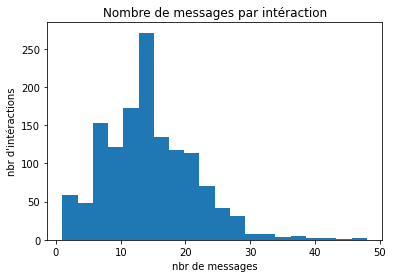

In [55]:
plt.hist(list_len_dialogues, 20)
plt.title('Nombre de messages par intéraction')
plt.xlabel('nbr de messages')
plt.ylabel('nbr d\'intéractions')
plt.show()

In [58]:
turns_list[0][0].keys()

dict_keys(['text', 'labels', 'author', 'timestamp'])

In [59]:
turns_list[0][1].keys()

dict_keys(['db', 'text', 'labels', 'author', 'timestamp'])

In [64]:
dict_author = {}

for turn in turns_list:
    for message in turn:
        author_label = message['author']
        if author_label not in dict_author.keys():
            dict_author[author_label] = 1
        else:
            dict_author[author_label] += 1

dict_author

{'user': 10407, 'wizard': 9579}

In [80]:
turns_list[0][0]

{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
 'labels': {'acts': [{'args': [{'val': 'book', 'key': 'intent'}],
    'name': 'inform'},
   {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
     {'val': 'Caprica', 'key': 'or_city'},
     {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
     {'val': '8', 'key': 'n_adults'},
     {'val': '1700', 'key': 'budget'}],
    'name': 'inform'}],
  'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
    'name': 'inform'},
   {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
     {'val': 'Caprica', 'key': 'or_city'},
     {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
     {'val': '8', 'key': 'n_adults'},
     {'val': '1700', 'key': 'budget'}],
    'name': 'inform'}],
  'active_frame': 1,
  'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
     'budget': [{'val': '1700.0', 'negated': False}],
     'dst_city': [{

In [132]:
def get_key_value(arg):
    if "key" in arg and "val" in arg:
        key = arg['key']
        value = arg['val']

        if value != '-1':
            return (key, value)

    return (None, None)


In [99]:
dict_keys = {}

for turn in turns_list:
    for message in turn:
        # Seulement les messages provenant de l'utilisateur
        if message['author'] == 'user':
            acts = message['labels']['acts']

            for act in acts:
                for arg in act['args']:
                        
                        key, value = get_key_value(arg)

                        if key == None or value == None:
                            break

                        if key not in dict_keys.keys():
                            dict_keys[key] = [value]
                        else:
                            dict_keys[key].append(value)

print(dict_keys.keys())

dict_keys(['intent', 'dst_city', 'or_city', 'str_date', 'n_adults', 'budget', 'ref', 'flex', 'max_duration', 'end_date', 'n_children', 'seat', 'category', 'breakfast', 'seat_ok', 'gst_rating', 'downtown', 'spa', 'min_duration', 'wifi', 'duration', 'price', 'budget_ok', 'intent_ok', 'parking', 'name', 'beach', 'ref_anaphora', 'count_name', 'count', 'museum', 'park', 'impl_anaphora', 'mall', 'shopping', 'count_dst_city', 'cathedral', 'university', 'action', 'n_adults_ok', 'count_seat', 'market'])


Les clés qui nous intéresse dans le cadre de ce MVP sont :

- **or_city** (Ville de départ)
- **dst_city** (Ville de destination)
- **str_date** (Date aller souhaitée du vol)
- **end_date** (Date retour souhaitée du vol)
- **budget** (Budget maximum pour le prix total des billets)

In [107]:
list_keys_kept = ['or_city', 'dst_city', 'str_date', 'end_date', 'budget']

print('Echantillons de valeurs pour les clés gardées :')
for key in list_keys_kept:
    print(f'{key} : ' ,dict_keys[key][:10])

Echantillons de valeurs pour les clés gardées :
or_city :  ['Caprica', 'Atlantis', 'Gotham City', 'Gotham City', 'Birmingham', 'Neverland', 'Toronto', 'Toronto', 'Busan', 'Kochi']
dst_city :  ['Atlantis', 'Neverland', 'Mos Eisley', 'Neverland', 'Mos Eisley', 'Neverland', 'Kobe', 'Gotham City', 'Caprica', 'San Antonio']
str_date :  ['Saturday, August 13, 2016', 'Sunday August 21, 2016', '17th of August', 'Saturday, August 13, 2016', 'August 27', 'Saturday, August 13, 2016', 'Monday, August 15, 2016', 'August 15', 'August 24', '19th']
end_date :  ['Wednesday August 31, 2016', '31st', 'Tuesday, August 16, 2016', 'Wednesday, August 31, 2016', 'August 31', 'Thursday, September 8, 2016', '16th', 'Saturday, September 3', '16th of August', 'Monday September 5']
budget :  ['1700', '1900', '2100', '$2500', '$2200', '$21,300', '$2400 USD', '$2900', 'cheapest', 'cheaper']


In [137]:
def get_entity_labels(text, key, value):
    
    text = text.lower()
    value = value.lower()

    return {
        'entity_name': key,
        'start_char_index': text.index(value),
        'end_char_index': text.index(value) + len(value)
    }

In [175]:
utterances = []

for turn in turns_list:
    for message in turn:
        # Seulement les messages provenant de l'utilisateur
        if message['author'] == 'user':
            text = message['text']
            entity_labels = []

            for act in message['labels']['acts']:
                for arg in act['args']:

                    key, value = get_key_value(arg)

                    if key not in list_keys_kept or key == None or value == None:
                        continue

                    entity_labels.append(get_entity_labels(text, key, value))
            
            if entity_labels:
                utterances.append({
                    'text': text,
                    'intent_name': 'BookFlight',
                    'entity_labels': entity_labels
                })

In [176]:
utterances[0]

{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
 'intent_name': 'BookFlight',
 'entity_labels': [{'entity_name': 'dst_city',
   'start_char_index': 27,
   'end_char_index': 35},
  {'entity_name': 'or_city', 'start_char_index': 41, 'end_char_index': 48},
  {'entity_name': 'str_date', 'start_char_index': 52, 'end_char_index': 77},
  {'entity_name': 'budget', 'start_char_index': 117, 'end_char_index': 121}]}

In [173]:
len(utterances)

4376